In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/Atomcamp/Admission_Predict (1).csv")

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# Check whether there are empty rows or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


- Drop serial number column
-describe
-missing values
-duplicates
-outliers
-distrubution
-data inconsist
-visualisations
-corelations
-linearity( LR)
-encoding?
-stand/ normalisation

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
# drop the serial column
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [11]:
#check for missing values
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [12]:
#chekc for duplicates
df.duplicated().sum()

np.int64(0)

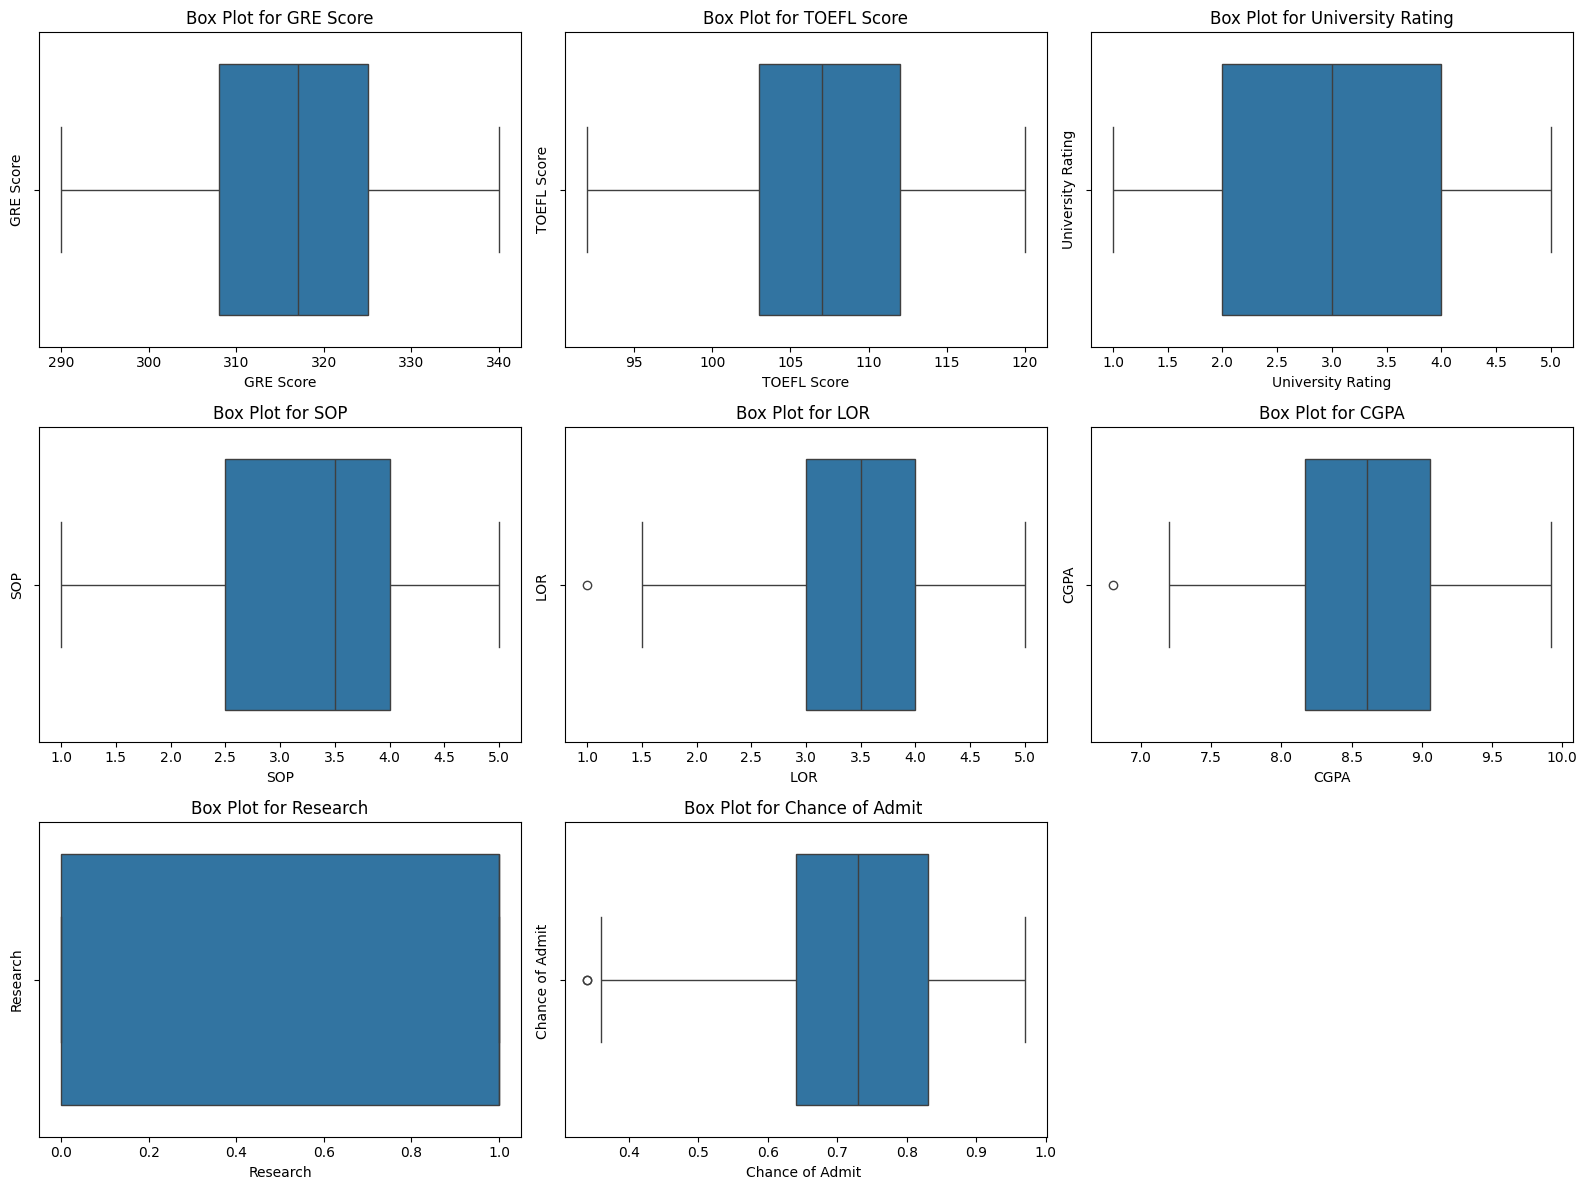

In [17]:
#Boxplot for checking outliers in numerical columns
plt.figure(figsize=(16, 12))
for i,col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [18]:
#check the row with 1 lor
df[df["LOR "] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [19]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


In [20]:
# data inconsistencies in Categorical columns
print(df["Research"].unique())
print(df["University Rating"].unique())

[1 0]
[4 3 2 5 1]


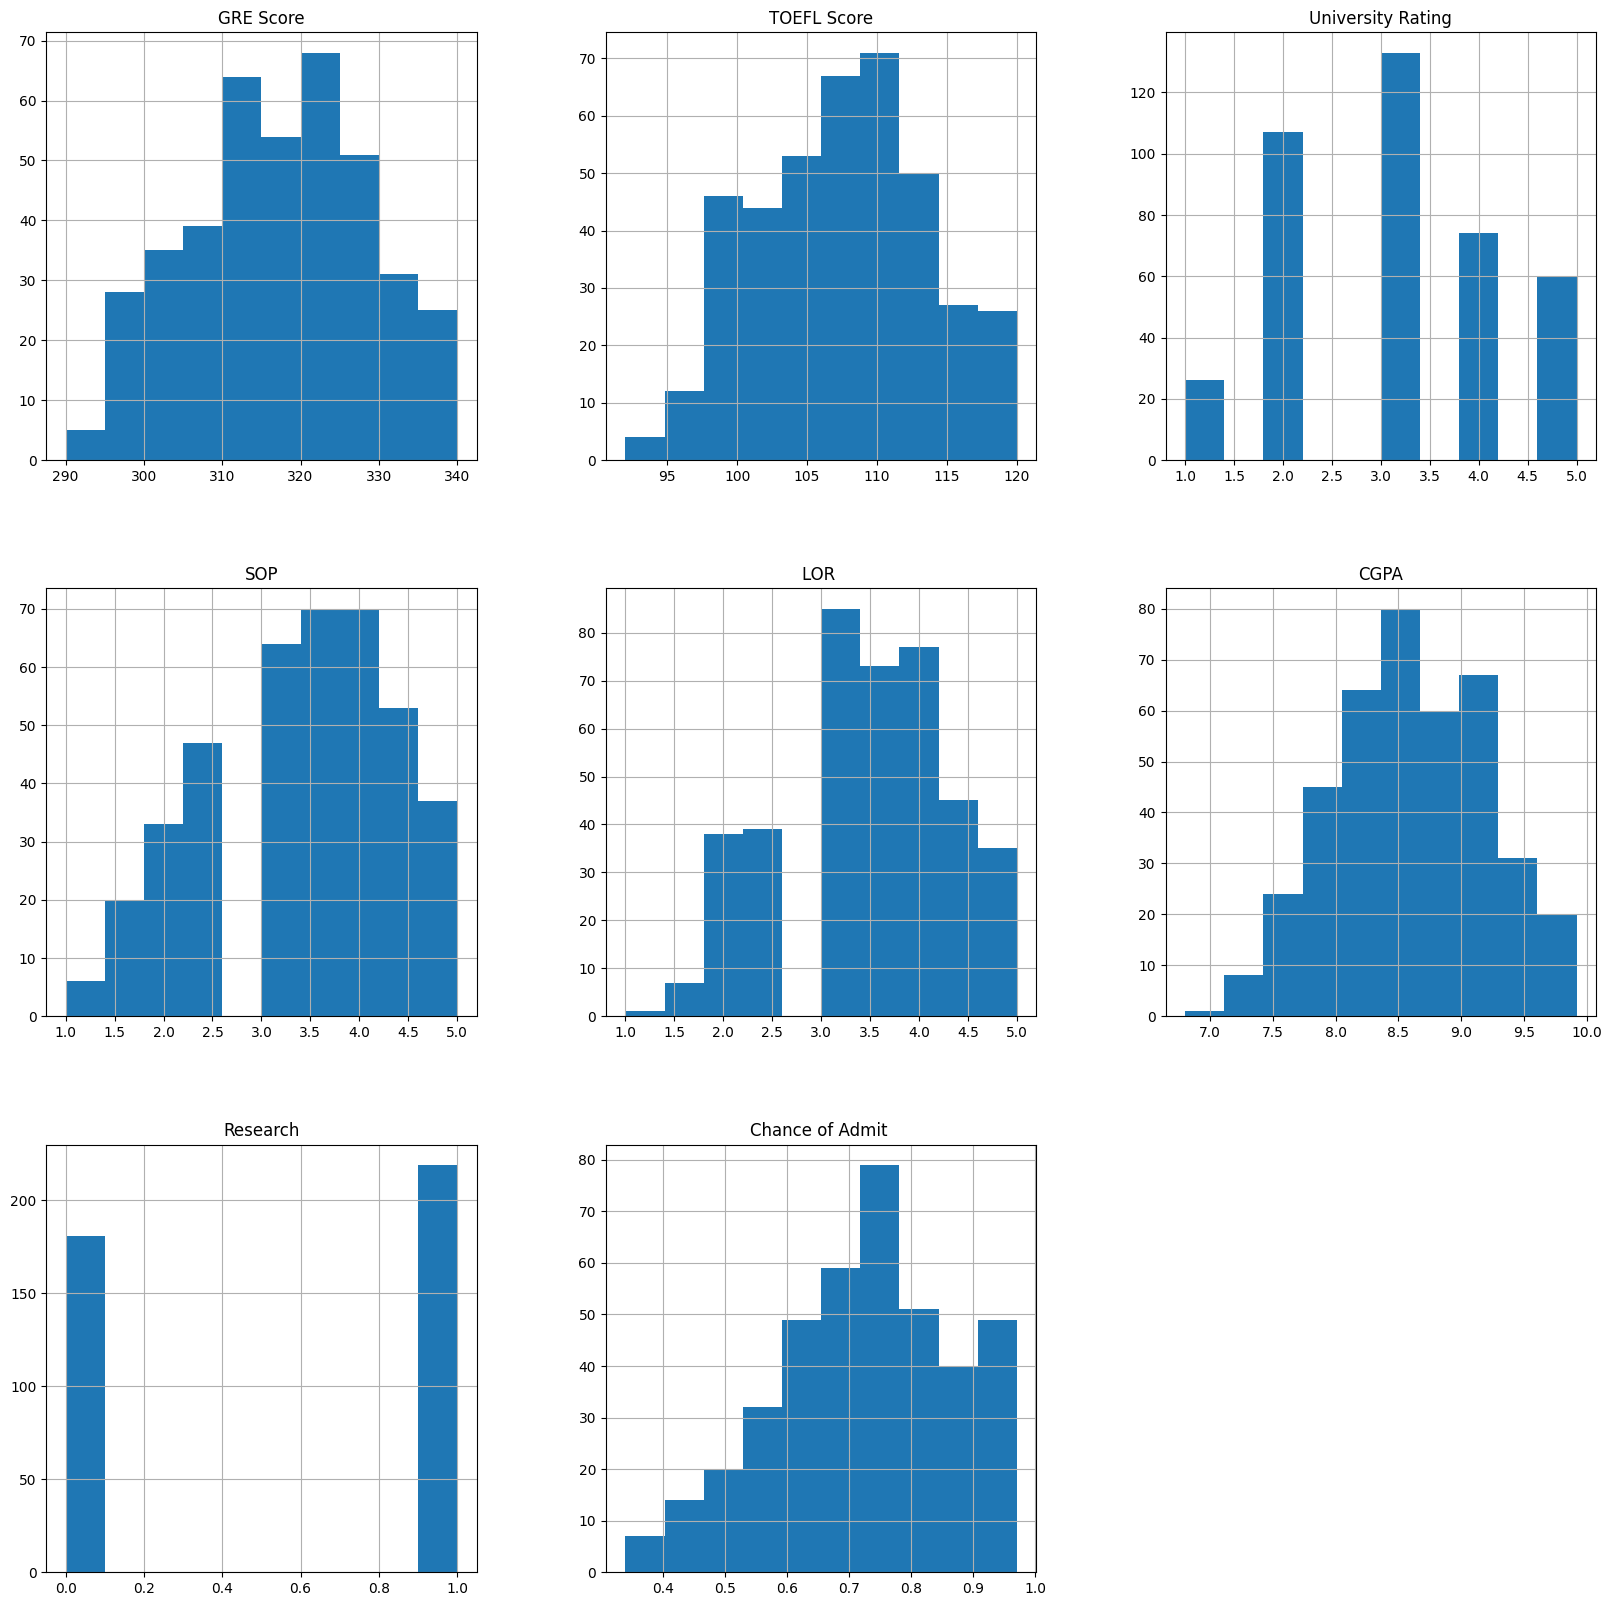

In [21]:
# distribution of numerical variable
df.hist(figsize=(20,20))
plt.show()

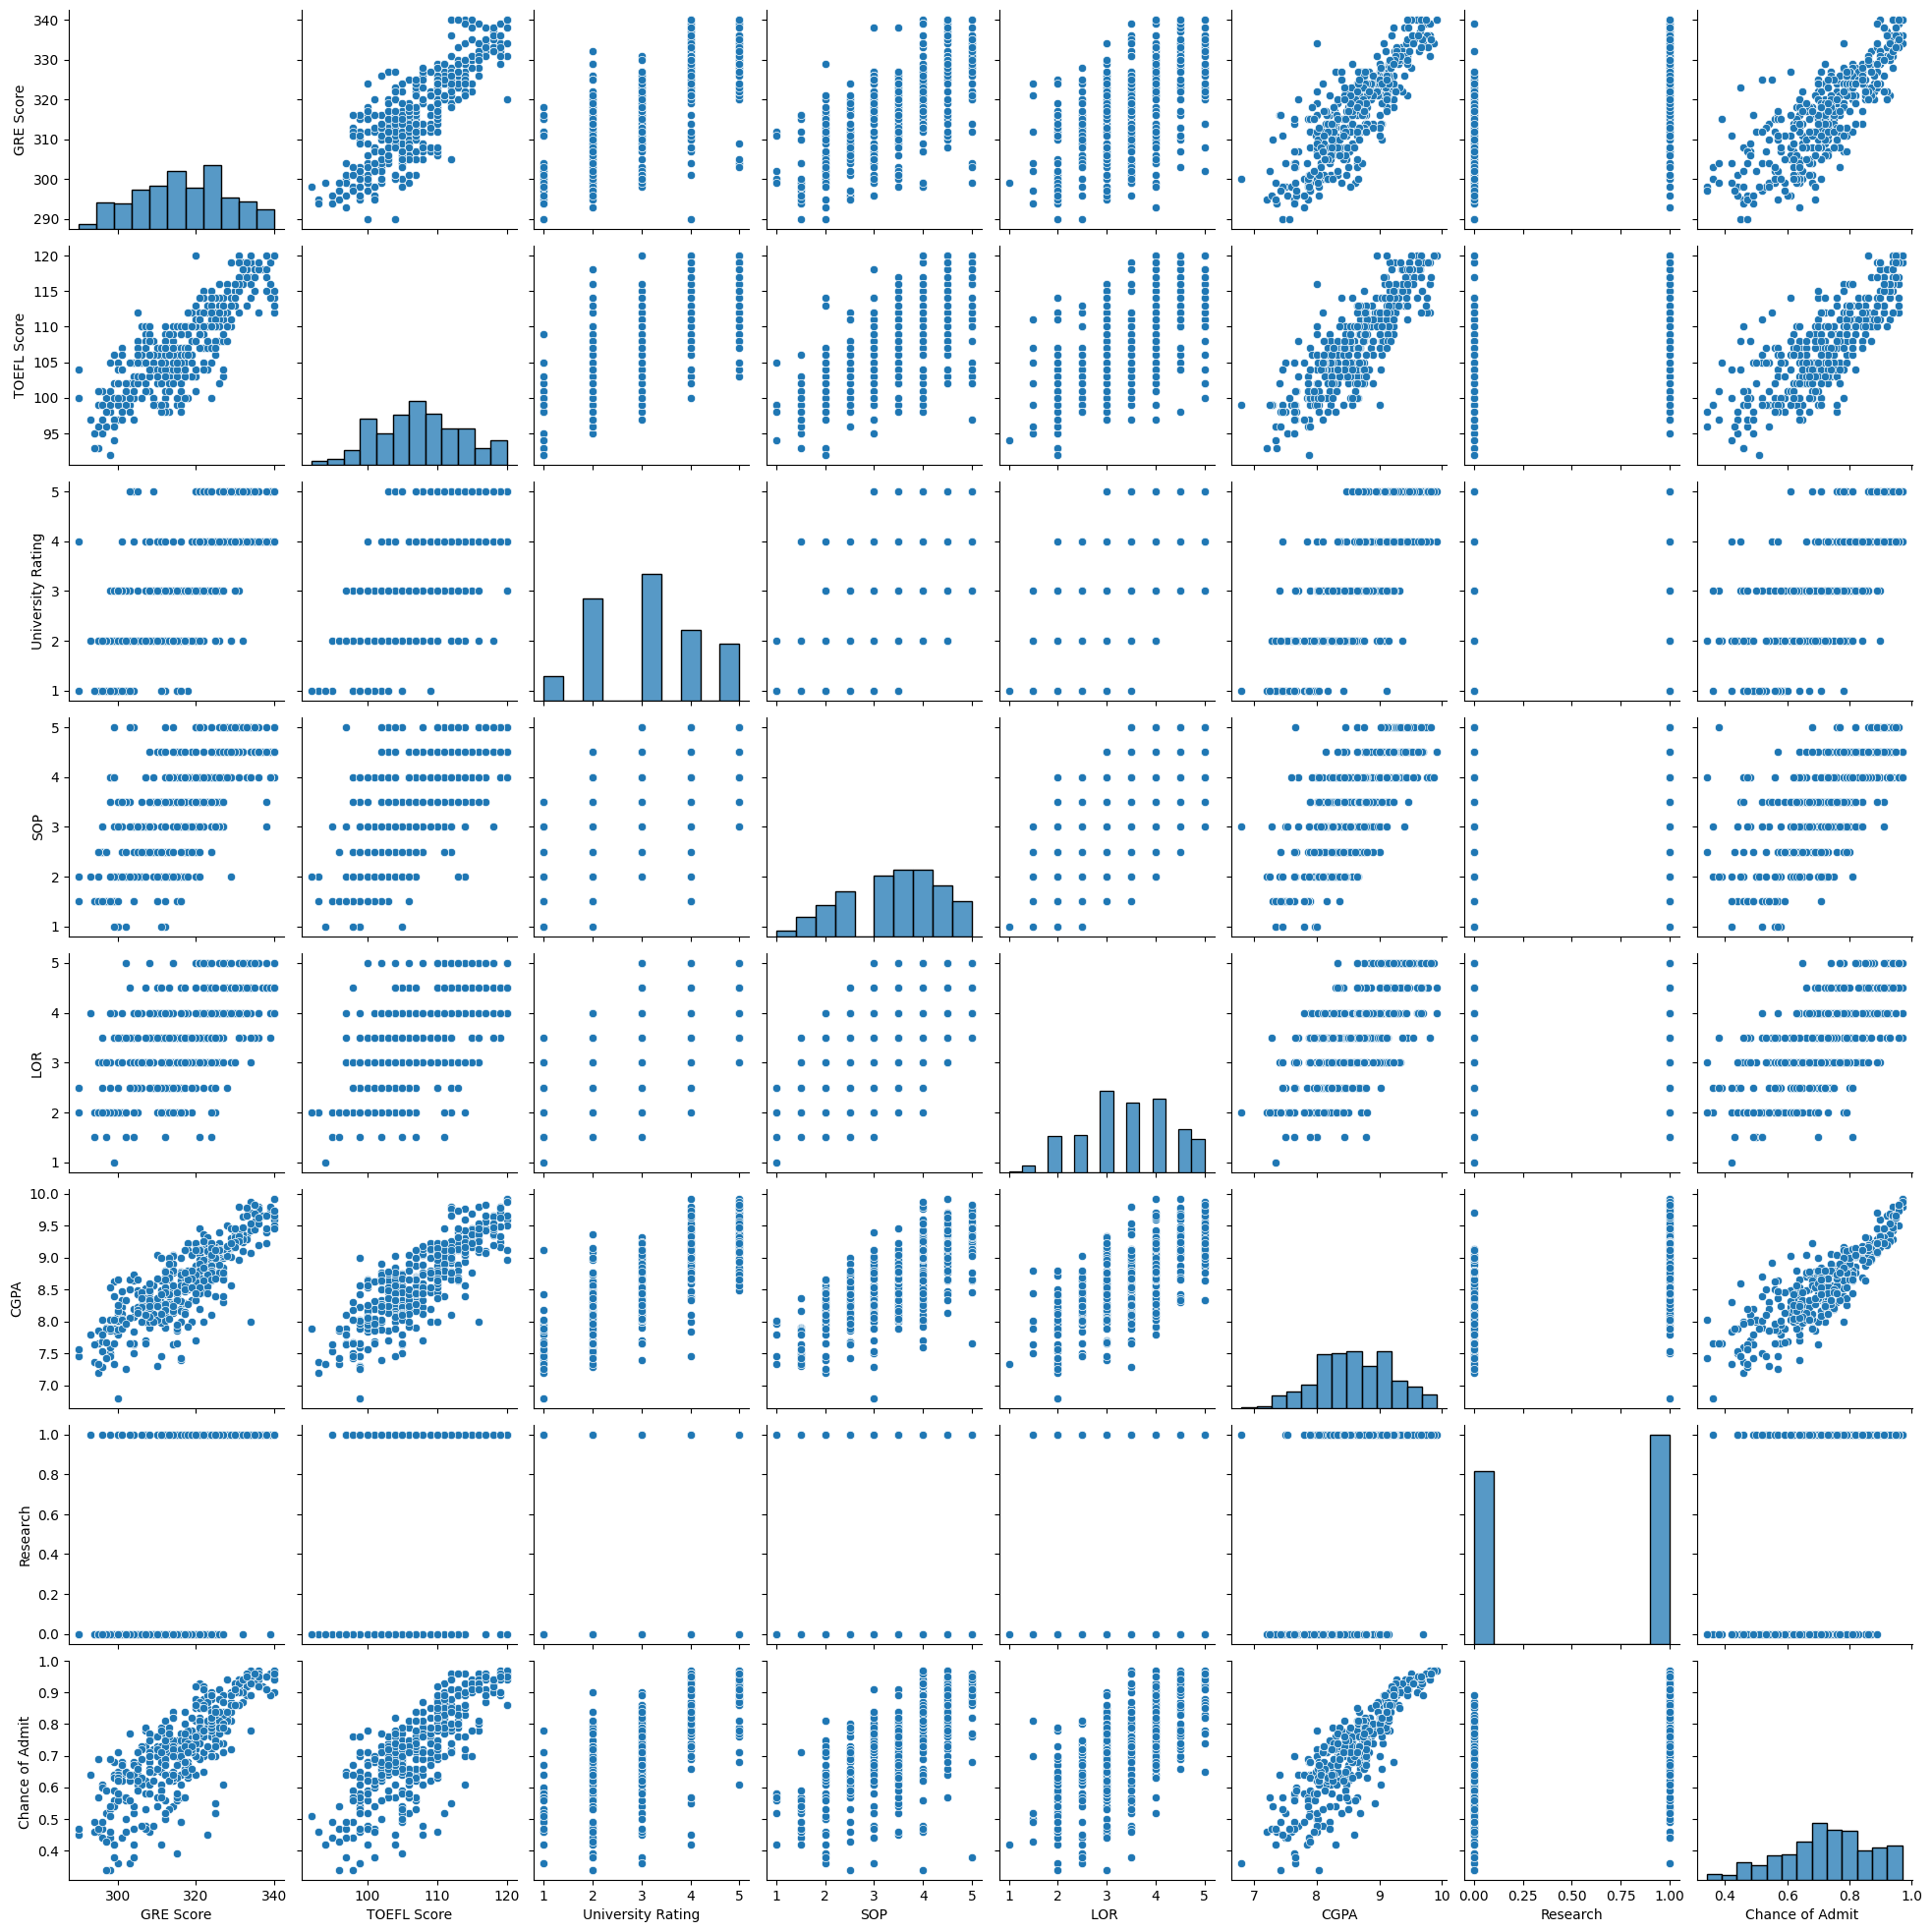

In [22]:
# linearity with chances of admission
sns.pairplot(df)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tightlayout'

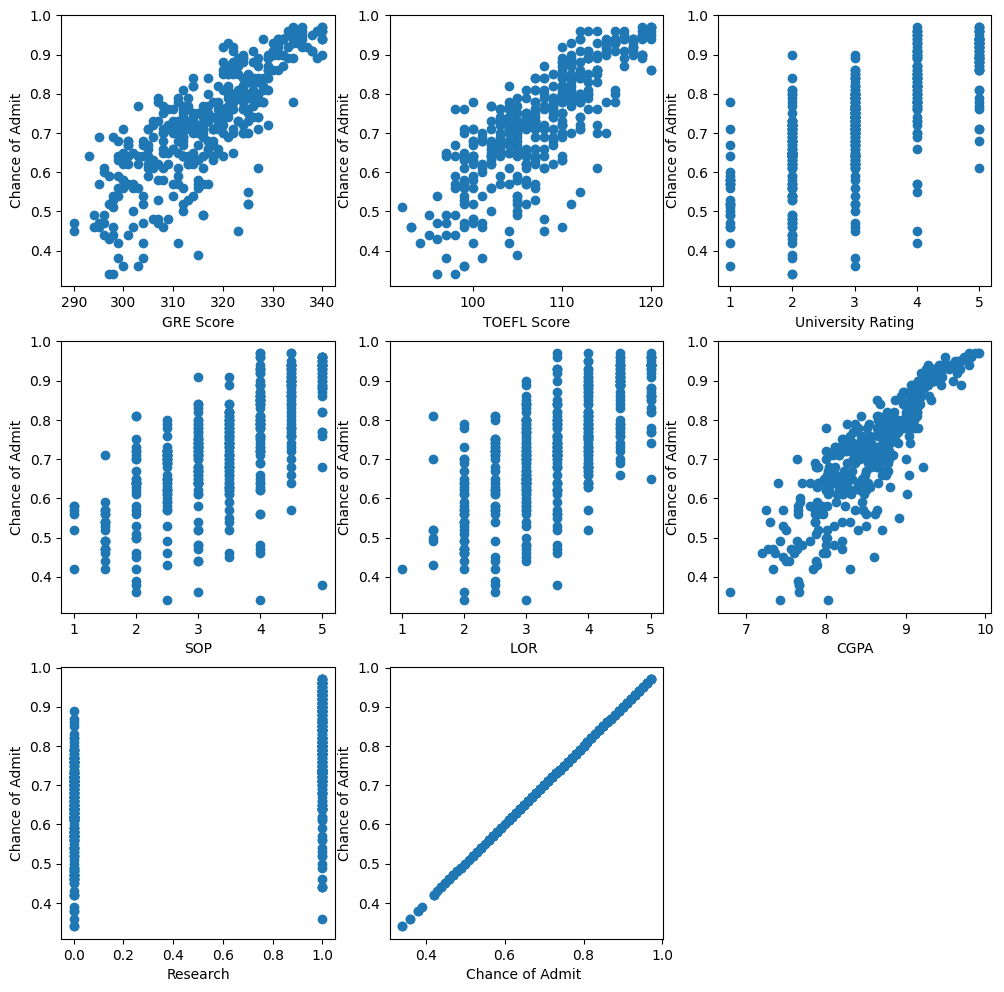

In [23]:
# scatter plot
plt.figure(figsize=(12,12))
for i,a in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
plt.tightlayout()
plt.show()

Tofel, gre, cgpa are highly linear with output( chances Of admissions)

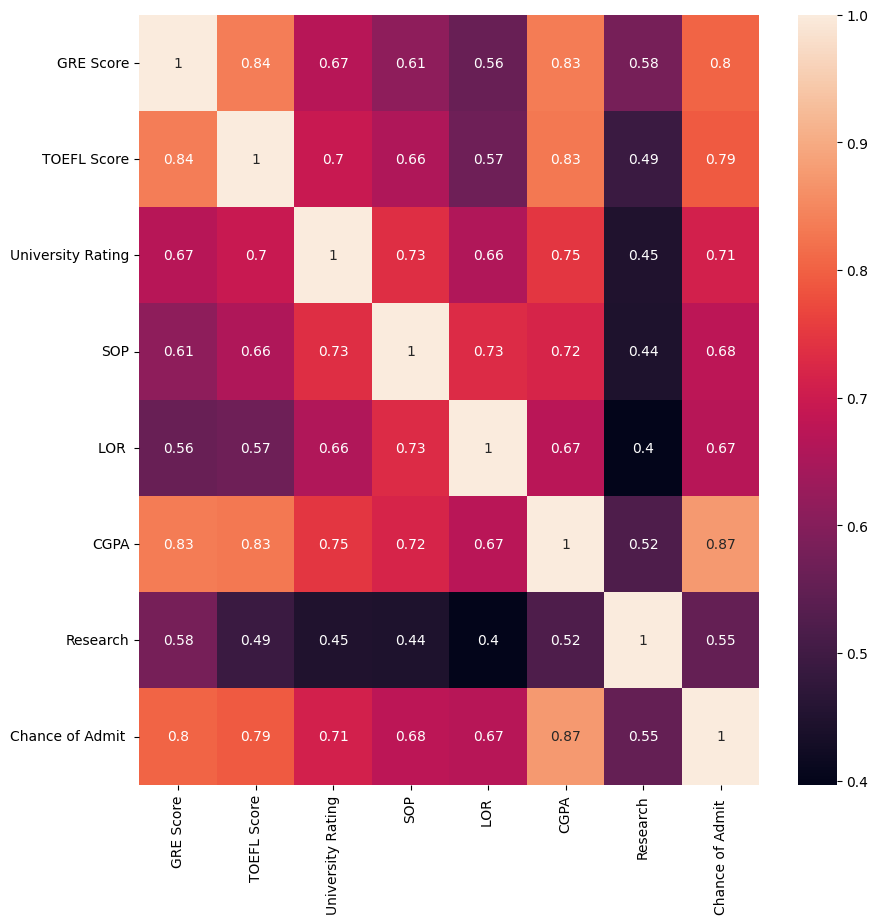

In [24]:
#heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

CGPA, GRE and TOFL are highly corelated with target

---



many columns highlhy multicolinear!--- LR a good choice?-- NO

try for DT and RF

In [25]:
# scaling of all data except chance of admission
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [26]:
#convert the response to df
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [27]:
#z score normalisation/ standardisation--- shape of the data -- sclae data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled


StandardScaler()

The above scaling was just for understanding the effect of scaling. We will train our model on original df.

In [28]:

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [32]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

# Reshape
x = df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit "].values.reshape(-1,1)
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Now, we can use above x&y axises on the fit operation of the linear regression model.

In [34]:
linear_reg.fit(x_train,y_train)

LinearRegression()

<a id="11"></a> <br>
**1.1. Prediction**

We will predict the values according to linear_reg model.

<a id="12"></a> <br>
**1.2. R Square (LR)**

We can evaluate the linear regression model performance with R Square.
* y: Chance of Admit values
* y_pred: predicted Chance of Admit value

First, we must be sure that y and y_pred values are using the same number of samples. If not, we will get an error like this:

ValueError: Found input variables with inconsistent numbers of samples: [500, 312]

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = linear_reg.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R2 Score: 0.8212082591486993


In [36]:
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=linear_reg.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

The predicted value is not a valid answer. LR is not a good option here due to multi collinearity.

In [37]:
# Creat the model and fit the x&y values.
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

In [38]:
# test my algo
#import numpy as np
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


In [39]:
#overfitting and unfitting
#import numpy as np
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


In [34]:
#GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

Decision Tree Regressor

In [40]:
# Decision Tree Library
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
y_pred_dtr = tree_reg.predict(x_test)

In [42]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_pred_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_pred_dtr))
print("R² Score for DT:", r2_score(y_test, y_pred_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.0097775
RMSE for DT: 0.09888124190158616
MAE for DT: 0.067
R² Score for DT: 0.6213699442425855


In [44]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35,45,55],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20,30,35],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_split=20, splitter='random')
Best Score (R2): 0.7267567177951593
Test Score (R2): 0.762265687030223


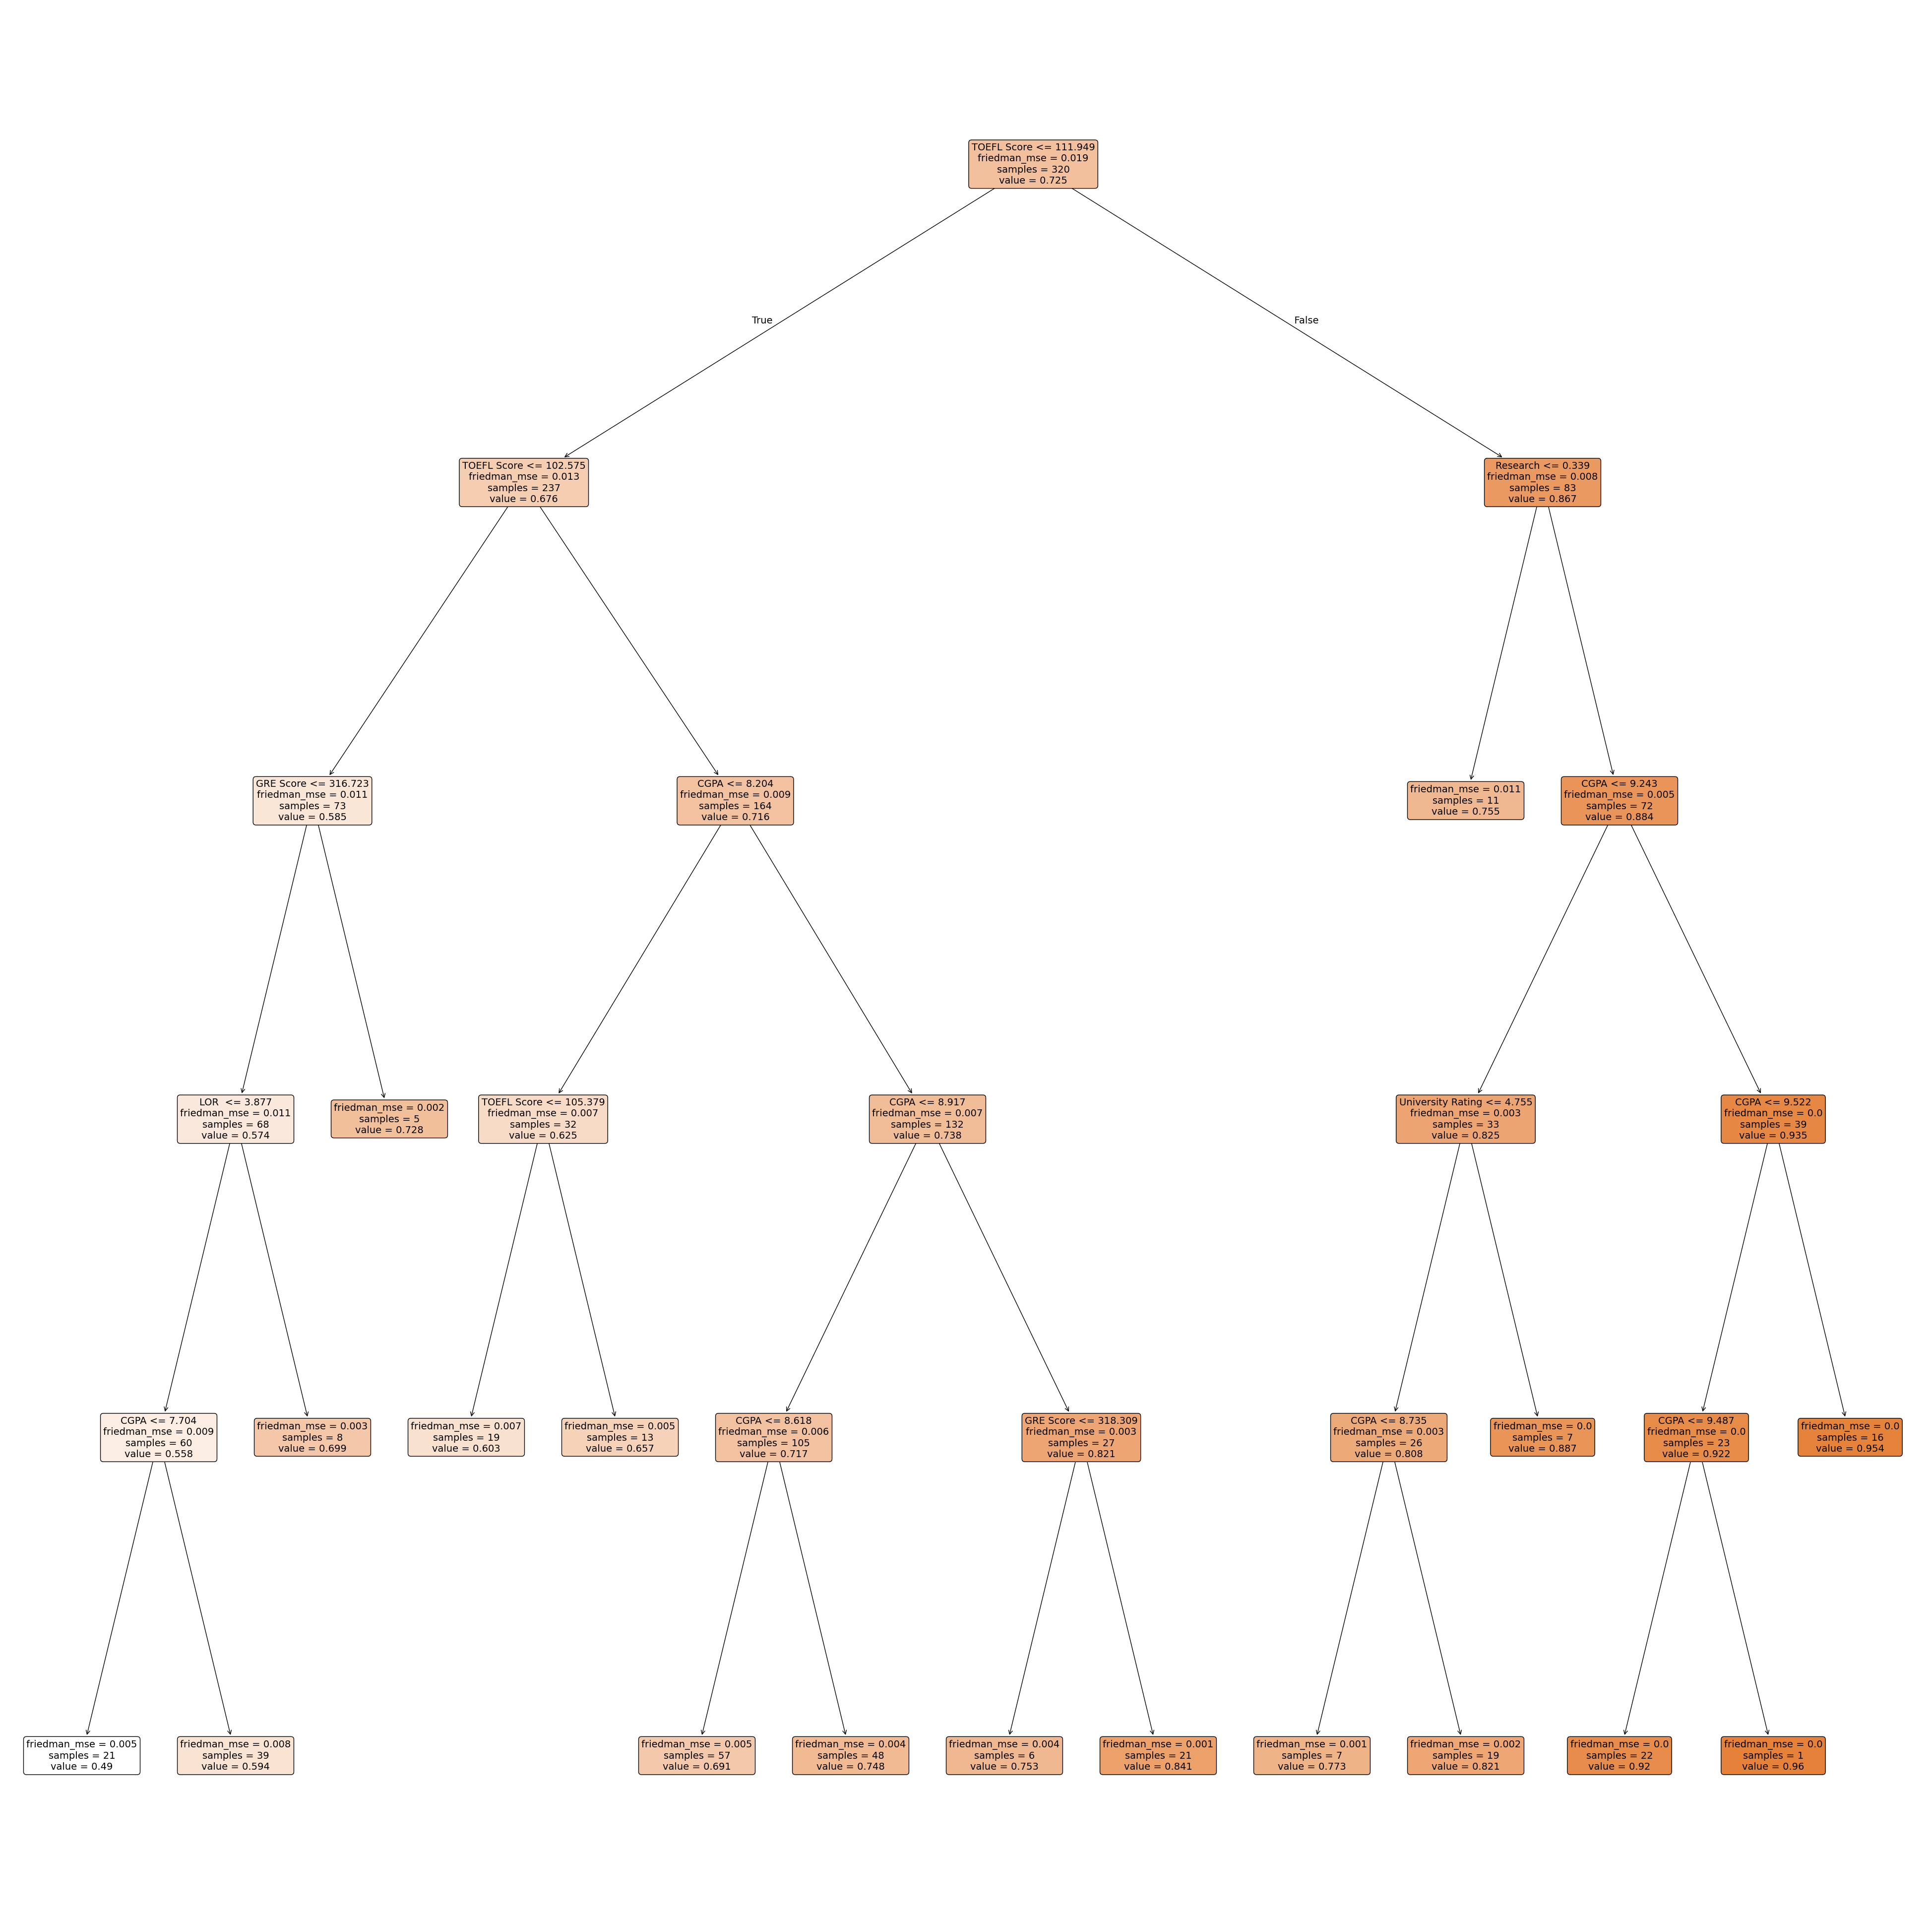

In [45]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [46]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)


--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT----------------------------------------------
[0.49]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**sklearn.tree.DecisionTreeRegressor:**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

**score(self, X, y, sample_weight=None)**

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Parameters:
X : array-like, shape = (n_samples, n_features)
Test samples. For some estimators this may be a precomputed kernel matrix instead, shape = (n_samples, n_samples_fitted], where n_samples_fitted is the number of samples used in the fitting for the estimator.

y : array-like, shape = (n_samples) or (n_samples, n_outputs)
True values for X.

sample_weight : array-like, shape = [n_samples], optional
Sample weights.

Returns:
score : float
R^2 of self.predict(X) wrt. y.

Notes

The R2 score used when calling score on a regressor will use multioutput='uniform_average' from version 0.23 to keep consistent with metrics.r2_score. This will influence the score method of all the multioutput regressors (except for multioutput.MultiOutputRegressor). To specify the default value manually and avoid the warning, please either call metrics.r2_score directly or make a custom scorer with metrics.make_scorer (the built-in scorer 'r2' uses multioutput='uniform_average').

<a id="5"></a> <br>
5. **Random Forest Regression (RFR)**

Random forest regression combined by  multiple regression.

It chooses n examples, divides the data to sub datas and uses multiple trees.

                     data
                       |
                       |
                    n sample
                       |
                       |
                    sub_data
         tree1   tree2  tree3 .... tree n
         ________________________________
        |           average               |
         ________________________________
                     result
                     
            
                 
                 

RandomForestRegressor(**n_estimators** = 100, **random_state** = 42)

This means we will use 100 tree (DTR) and 42 sample. The algorithm chooses the n samples randomly. We gave a constant number for the random state, therefore the algorithm will select the same 42 examples on the next time.

In [47]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators = 100 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [48]:
y_pred_rf=random_forest_reg.predict(x_test)
#y_rf

In [49]:


print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_pred_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score for DT:", r2_score(y_test, y_pred_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [50]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_pred_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_pred_dtr))
print("R² Score for DT:", r2_score(y_test, y_pred_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_pred_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score for DT:", r2_score(y_test, y_pred_rf))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.0097775
RMSE for DT: 0.09888124190158616
MAE for DT: 0.067
R² Score for DT: 0.6213699442425855
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.762265687030223
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


**Random Forest Tuning**
Using RandomizedSearchCV as it takes less time

In [52]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_RF = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10,15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
RF_tuned_randomizedCV = RandomizedSearchCV(random_forest_reg, param_grid_RF,n_iter=10)
RF_tuned_randomizedCV.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150]})

In [54]:
#This block will take approx 10 mins
#RandomForestRegressor().get_params().keys()
#param_grid_RF = {
#    'n_estimators': [100, 150],
#    'max_depth': [None, 10,15],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'bootstrap': [True, False]
#}
#RF_tuned = GridSearchCV(random_forest_reg, param_grid_RF)
#RF_tuned.fit(x_train, y_train)

In [55]:
rf_tuned_pred = RF_tuned_randomizedCV.predict(x_test)

In [57]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_pred_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_pred_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, rf_tuned_pred))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6213699442425855
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.762265687030223
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8193939253311215


**Feature Selection Based Modelling**

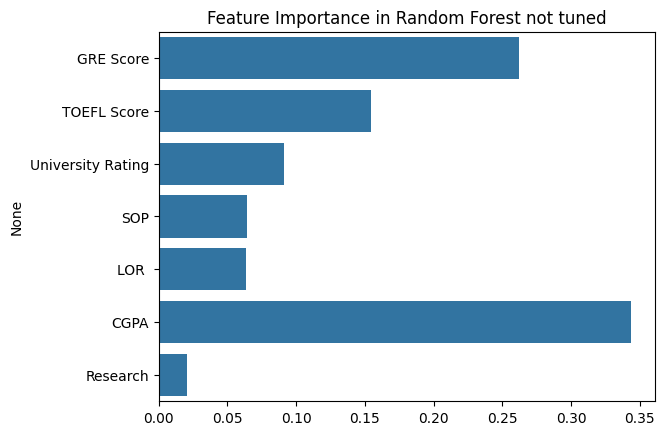

In [59]:
import seaborn as sns

# Get feature importance scores
best_model = RF_tuned_randomizedCV.best_estimator_
importances = best_model.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()



In [62]:
#Keeping top 3 features only
df.drop(['University Rating','SOP','LOR ','Research'],axis=1,inplace=True)

In [63]:
X = pd.DataFrame(data = df, columns = df.columns)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
Three_features_model_RF_Tuned = RF_tuned_randomizedCV.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [69]:
y_pred_rf_tuned_new = Three_features_model_RF_Tuned.predict(X_test)
y_pred_rf_tuned_new_traindata = Three_features_model_RF_Tuned.predict(X_train)

In [73]:
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF_Tuned with three features on test data:", r2_score(y_test, y_pred_rf_tuned_new))
print("R² Score for RF_Tuned with three features on training data:", Three_features_model_RF_Tuned.score(X_train,y_train))

--------------------Result for RF tuned----------------------------------------------
R² Score for RF_Tuned with three features on test data: 0.990231069619584
R² Score for RF_Tuned with three features on training data: 0.9994153011909306


In [76]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_pred_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_pred_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, rf_tuned_pred))

print("--------------------Result for RF tuned with three features only----------------------------------------------")
print("R² Score for RF_Tuned with three features on test data:", r2_score(y_test, y_pred_rf_tuned_new))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6213699442425855
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.762265687030223
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8193939253311215
--------------------Result for RF tuned with three features only----------------------------------------------
R² Score for RF_Tuned with three features on test data: 0.990231069619584


Random forest tuned with three features is the best model
CPGA and TOFL score have the hightes impact to make an accurate predcition.